<div class="alert alert-block alert-success" style="font-size: 20px"> <b>Example of experiments with different metaheuristics for optimisation of binary problems</b></div>

<div class="alert alert-block alert-success" style="font-size: 16px"> Specification of the parameters used in the simulation</div>

In [1]:
from aux_functions import *

In [2]:
problem_dim = 10
problem = "Knapsack"

tw_size=10
num_iter = 500
num_executions = 5
population_size = 100
algorithms = ["BPSO", "ABCBin", "BCSO", "BGA"]

In [3]:
# Directory to the simulation output files
output_dir = "C:/Users/cj413/Documents/GitHub/INs/results"
# Directury to save the results of this notebook
processed_results_dir = output_dir + "/processed/binary"

if not os.path.isdir(processed_results_dir):
    os.makedirs(processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Loading the network files</div>

In [4]:
networks_per_tw_dict = load_alg_network(algorithms, population_size, num_iter, num_executions, problem, 
                                        problem_dim, tw_size, output_dir)
networks_per_tw_dict.keys()

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

dict_keys(['BPSO', 'ABCBin', 'BCSO', 'BGA'])

<div class="alert alert-block alert-success" style="font-size: 16px"> Exporting and ploting some examples of network</div>

  0%|          | 0/4 [00:00<?, ?it/s]

BPSO


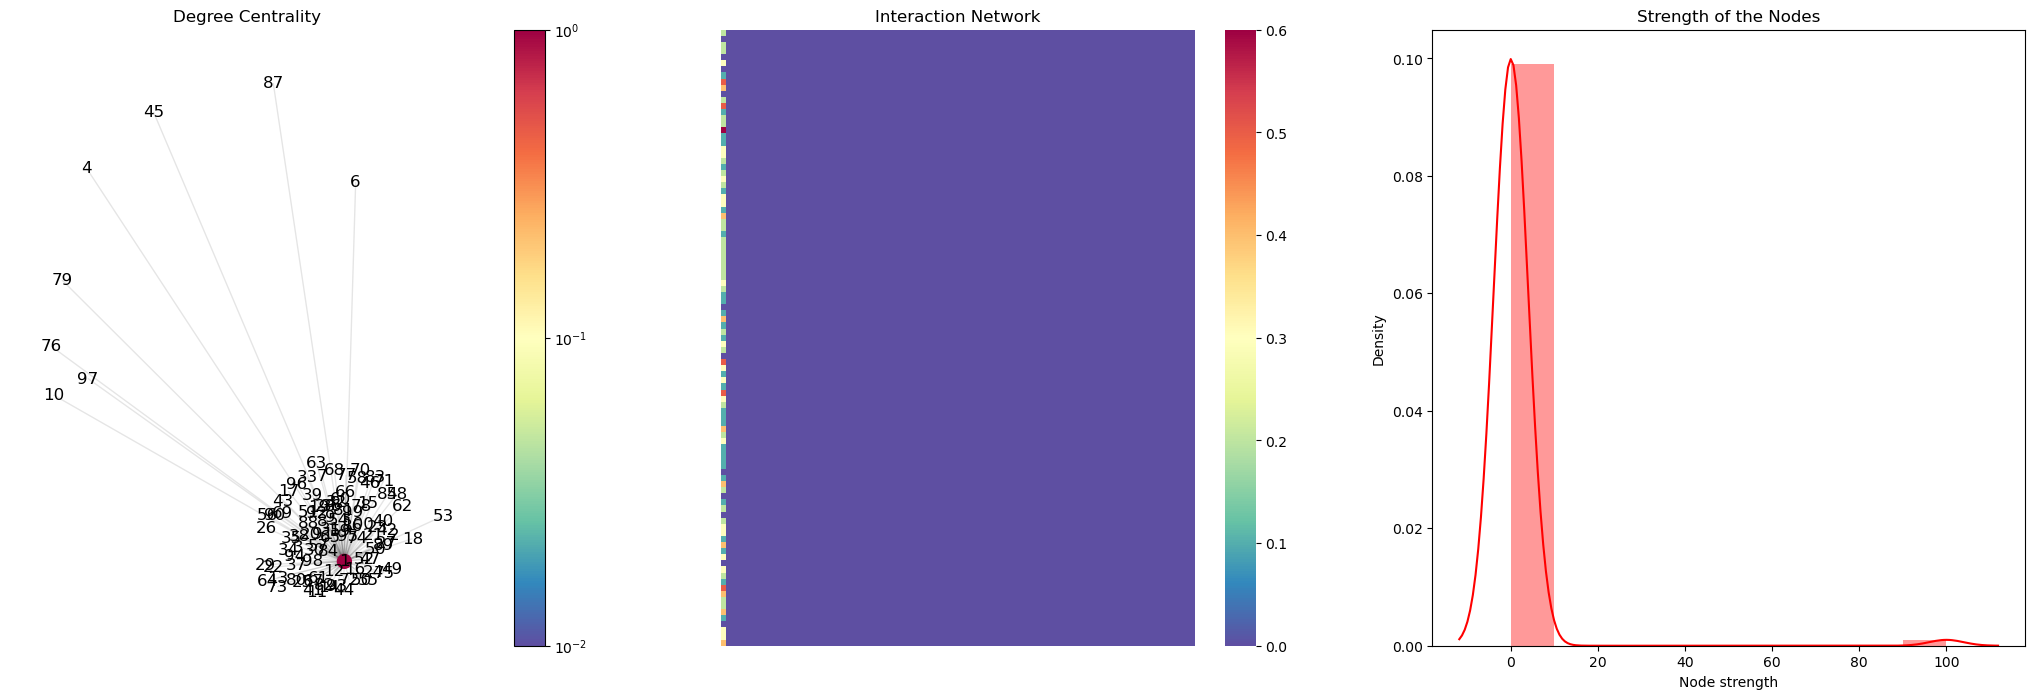

ABCBin


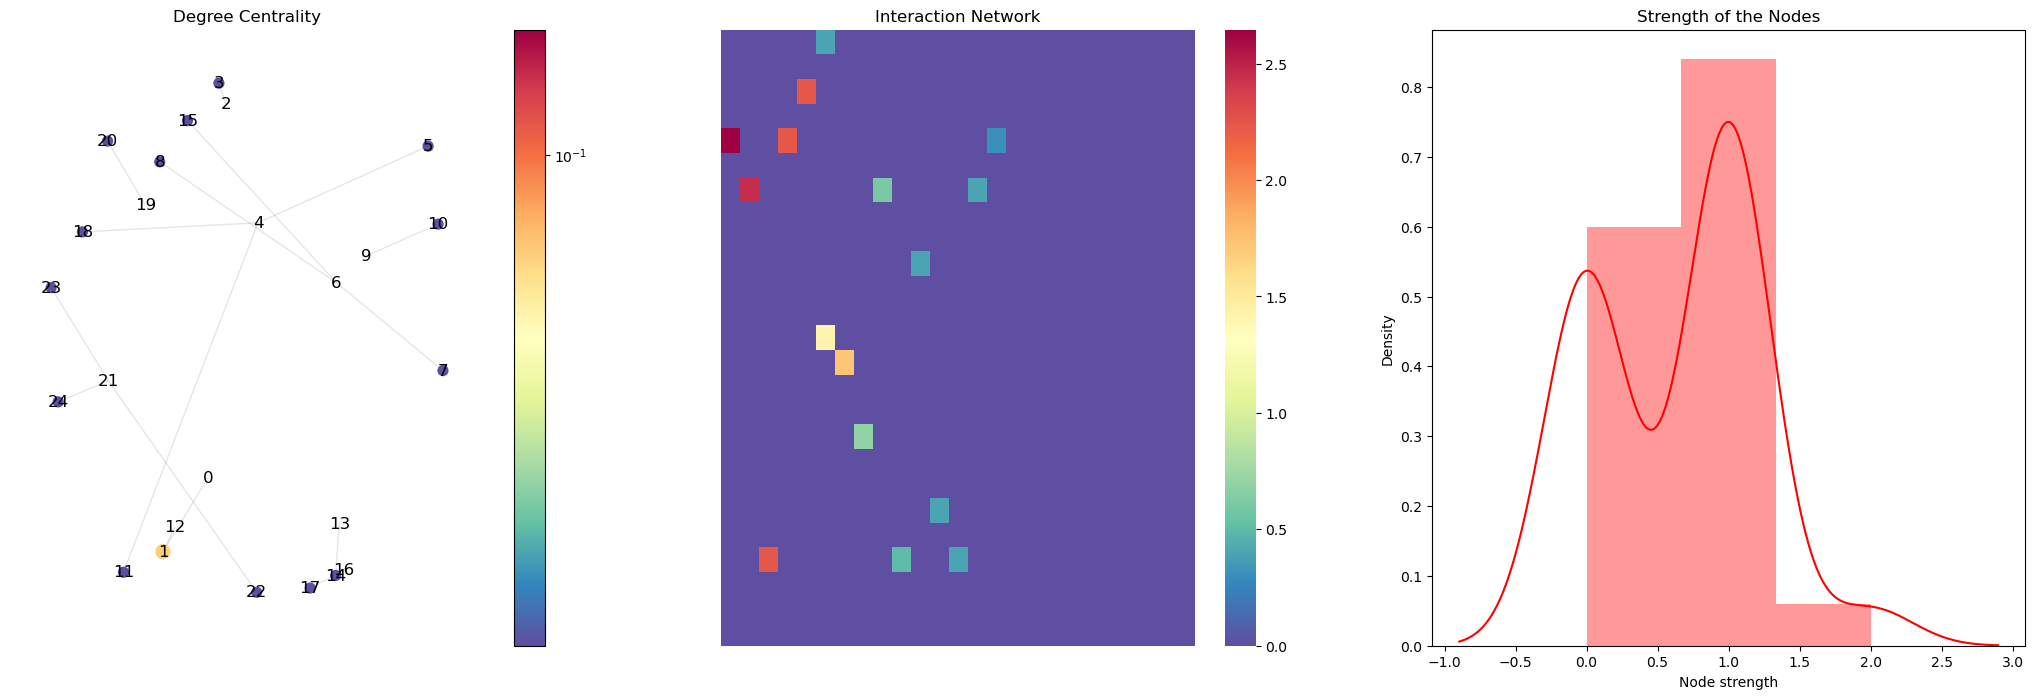

BCSO


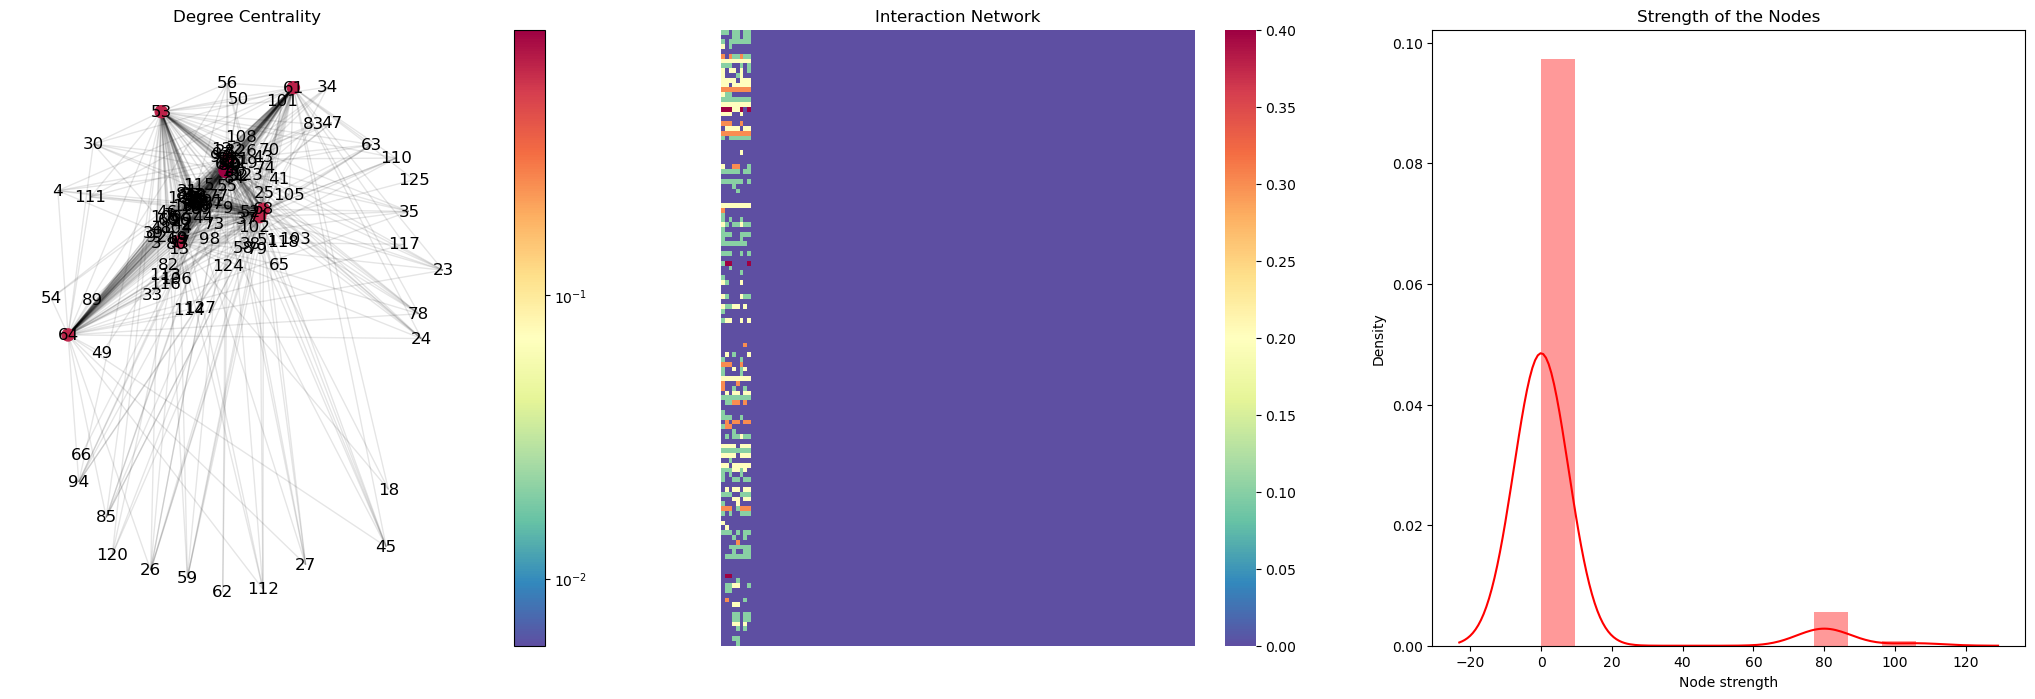

BGA


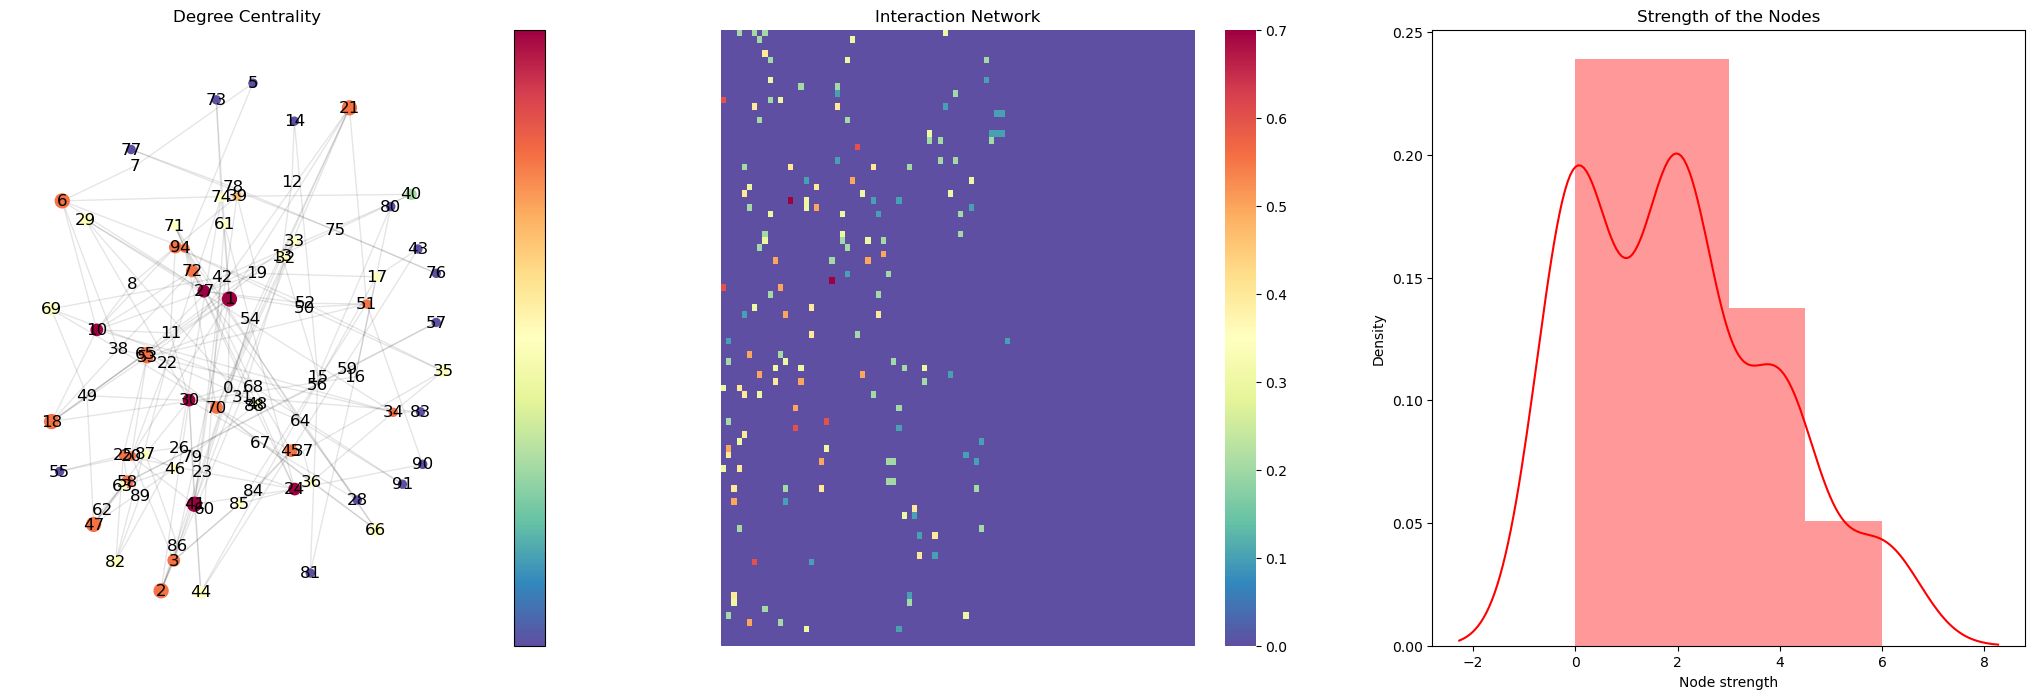

In [5]:
for alg_name, data in tqdm(networks_per_tw_dict.items(), leave=False):
    for exec_, networks in data.items():
        for tw_, net in networks.items():
            file_name = '/{}_{}_tw_size{}_tw{}_ex{}.gml'.format(alg_name, problem, tw_size, tw_, exec_)
            nx.write_gml(net, processed_results_dir + file_name)
    plot_sample_network(alg_name, net)

<div class="alert alert-block alert-success" style="font-size: 16px"> Using PD to compare different executions</div>

  0%|          | 0/4 [00:00<?, ?it/s]

BPSO_BPSO


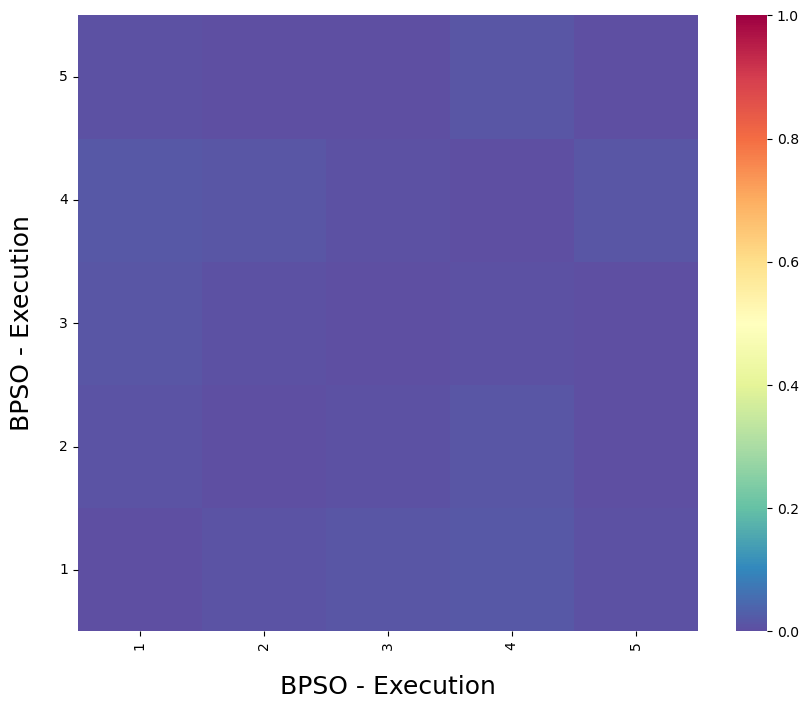

ABCBin_ABCBin


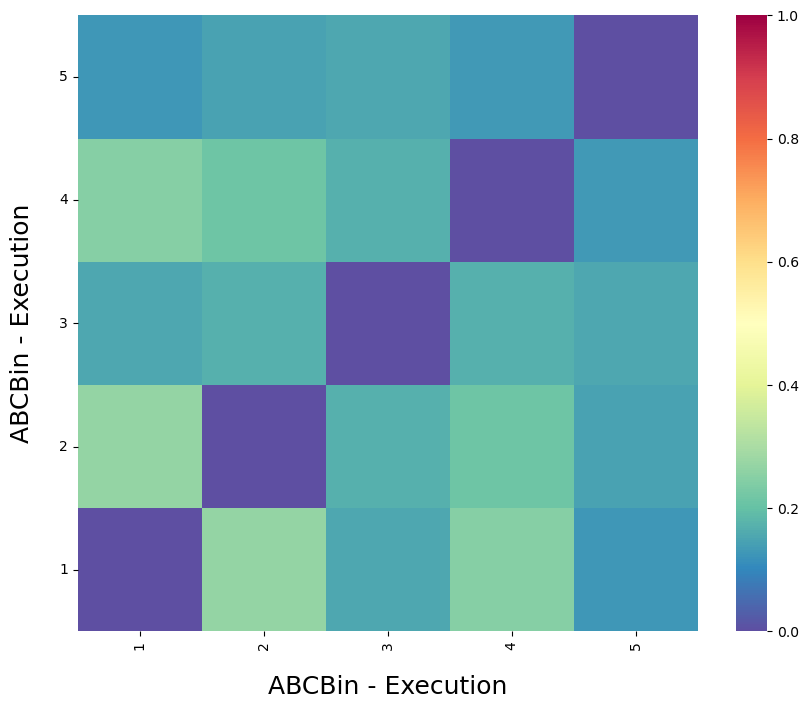

BCSO_BCSO


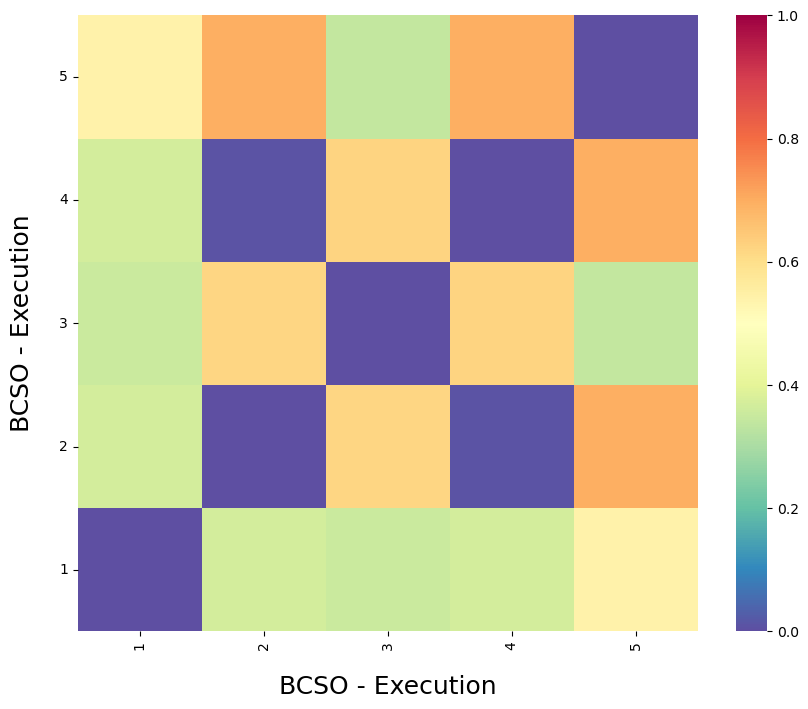

BGA_BGA


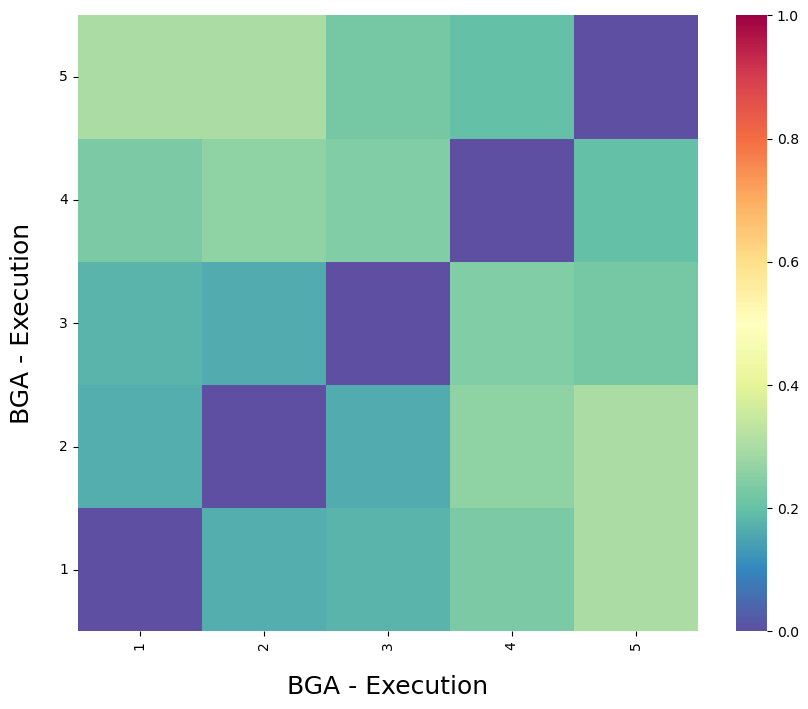

In [6]:
for alg_name1, data1 in tqdm(networks_per_tw_dict.items(), leave=False):
    plot_matrix_exec((alg_name1, data1), (alg_name1, data1), "_".join([str(alg_name1), str(alg_name1)]), processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Using PD to compare different time windows</div>

In [ ]:
for alg_name1, data1 in tqdm(networks_per_tw_dict.items(), leave=False):
    plot_matrix_tw((alg_name1, data1), (alg_name1, data1), tw_size, processed_results_dir)

  0%|          | 0/4 [00:00<?, ?it/s]

BPSO BPSO


<div class="alert alert-block alert-success" style="font-size: 16px"> Visualisation of optimisation metrics </div>

In [ ]:
swarm_data = {}
for alg, data in networks_per_tw_dict.items():  
    temp_ = load_data_per_tw(alg, num_execs=num_executions, num_iter=num_iter, tw=tw_size, dim=problem_dim, 
                             func=problem, output_dir=output_dir)
    swarm_data[alg] = temp_
plot_swarm_curves(swarm_data, show_std=False,log=True)

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualisation of network metrics </div>

In [ ]:
network_data = get_network_data(networks_per_tw_dict)
plot_network_curves(network_data, show_std=False, log=True)

<div class="alert alert-block alert-success" style="font-size: 16px"> Interaction diversity curves</div>

In [ ]:
id_data = get_id_data(networks_per_tw_dict)
plot_id_curves(id_data, True) 

<div class="alert alert-block alert-success" style="font-size: 16px">Preparing a dataframe based on the TWs' PD heatmap</div>

In [ ]:
alg_dataframe_pd = pd.DataFrame(columns=['Algorithm1', 'Algorithm2', 'PD'])
for a1 in tqdm(algorithms, leave=False):
    for a2 in tqdm(algorithms, leave=False):
        try:
            data_alg = pd.read_csv(processed_results_dir+f'/{a1}_{a2}_pd_difference_results_tw.txt', header=None)
            data_ = [[a1, a2, pd_val] for pd_val in data_alg[0].values]
            temp_df = pd.DataFrame(data_, columns=['Algorithm1', 'Algorithm2', 'PD'])
            alg_dataframe_pd = pd.concat([alg_dataframe_pd, temp_df])
        except:
            pass
alg_dataframe_pd.head()

In [ ]:
test_algo_df = pd.DataFrame()
num_tws = num_iter//tw_size
for a in alg_dataframe_pd.Algorithm1.unique():
    line = []
    for e in range(0, num_tws*num_tws*num_executions, num_tws*num_tws):
        mat = np.reshape(alg_dataframe_pd[(alg_dataframe_pd.Algorithm1==a) & (alg_dataframe_pd.Algorithm2==a)]['PD'].values[e:e+(num_tws*num_tws)], (num_tws, num_tws))
        ct = num_tws
        for r in range(num_tws):
            for c in range(ct):
                line.append(mat[r][c])
            ct -= 1
    test_algo_df[a] =  line
test_algo_df.head()

<div class="alert alert-block alert-success" style="font-size: 16px"> Using different statistical test to compare the distributions of the algorithms</div>

In [ ]:
for a1 in test_algo_df.columns:
    for a2 in test_algo_df.columns:
        ks = kendalltau(test_algo_df[a1].values, test_algo_df[a2].values)
        print('{} vs {}: '.format(a1, a2), ks)
    print()

In [ ]:
for a in alg_dataframe_pd.columns:
    print(a, shapiro(alg_dataframe_pd[a].values))

<div class="alert alert-block alert-success" style="font-size: 16px"> Creating the adjacency matrix based on the PD heatmaps per TWs</div>

In [ ]:
graphs_alg = {}
num_tws = num_iter//tw_size
for a in algorithms:
    exs_g = []
    mat_pds = alg_dataframe_pd[(alg_dataframe_pd.Algorithm1 ==a) & (alg_dataframe_pd.Algorithm2 ==a)]['PD'].values
    mat_pds = np.array([1/x if 0.05 < x <= .5 else 0 for x in mat_pds] )
    print(max(mat_pds))
    for ex in range(num_executions):
        exs_g.append(nx.from_numpy_matrix(np.reshape(mat_pds.reshape(num_executions, num_tws*num_tws)[ex], (num_tws, num_tws))))
        
    sns.heatmap(np.reshape(mat_pds.reshape(num_executions, 2500).mean(axis=0), (50, 50)), cmap=plt.cm.Spectral_r)
    plt.title(a)
    plt.show()
    graphs_alg[a] = exs_g

<div class="alert alert-block alert-success" style="font-size: 16px"> Creating PD comparison dataframe</div>

In [ ]:
res_df = []
for a1, net1 in tqdm(graphs_alg.items(), leave=False):
    for a2, net2 in graphs_alg.items():
        for ex in range(num_executions):
            if a1 != a2:
                w_djs, w_bg, w_bh = portrait_divergence_weighted(net1[ex], net2[ex])              
                res_df.append([a1, a2, w_djs])
res_df = pd.DataFrame(res_df, columns=['Algorithm1', 'Algorithm2', 'PD'])    
res_df.head()

<div class="alert alert-block alert-success" style="font-size: 16px"> Similarity comparison using boxplots</div>

In [ ]:
for a in tqdm(algorithms, leave=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x="Algorithm2", y="PD", data=res_df[res_df.Algorithm1 == a])
    plt.xticks(rotation=45)
    plt.ylim([0, 1])
    plt.title(f"Ref. {a}")
    plt.show()

<div class="alert alert-block alert-success" style="font-size: 16px"> Preparing the data to analise the distributions </div>

In [ ]:
alg_dataframe_pd = pd.DataFrame(columns=['Algorithm', 'PD'])
for a in tqdm(algorithms, leave=False):
    data_alg = pd.read_csv(processed_results_dir+'/{}_{}_pd_difference_results_tw.txt'.format(a, a), header=None)
    data_ = [[a, pd_val] for pd_val in data_alg[0].values]
    temp_df = pd.DataFrame(data_, columns=['Algorithm', 'PD'])
    alg_dataframe_pd = pd.concat([alg_dataframe_pd, temp_df])
alg_dataframe_pd.head()

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualising the OCDF distributions</div>

In [ ]:
colors = ['#E20809', '#2E79B5']
sns.displot(alg_dataframe_pd[alg_dataframe_pd.Algorithm.isin(['GPSO', 'PSOPS'])], x='PD', 
            kind='ecdf', hue='Algorithm', aspect=1., linewidth=4, palette=colors)
plt.show()

<div class="alert alert-block alert-success" style="font-size: 16px">Comparing the generated networks using the PD metric</div>

In [ ]:
res_df = pd.DataFrame()
for a1, net1 in graphs_alg.items():
    for a2, net2 in graphs_alg.items():
        res_g = []
        for ex in range(num_executions):
            w_djs, w_bg, w_bh = portrait_divergence_weighted(net1[ex], net2[ex])  
            res_g.append(w_djs)
        if a1 != a2:
            res_df["{} vs {}: ".format(a1, a2)] = res_g
        print("{} vs {}: ".format(a1, a2), np.mean(w_djs))
    print()
res_df.head()

<div class="alert alert-block alert-success" style="font-size: 16px"> PD heatmaps: Mean and STD values</div>

In [ ]:
test_algo_df = pd.DataFrame()
num_tws = num_iter//tw_size
for a in alg_dataframe_pd.columns:
    line = []
    for e in range(0, num_tws*num_tws*num_executions, num_tws*num_tws):
        line.append(alg_dataframe_pd[a][e:e+(num_tws*num_tws)].values)
    fig, axs = plt.subplots(ncols=2, figsize=(20, 9))
    mean_d = np.mean(line, axis=0)
    std_d = np.std(line, axis=0)
    sns.heatmap(np.reshape(mean_d, (num_tws, num_tws)), ax=axs[0], vmin=0, vmax=1, cmap=plt.cm.Spectral_r)
    sns.heatmap(np.reshape(std_d, (num_tws, num_tws)), ax=axs[1], vmin=0, vmax=0.3, cmap=plt.cm.RdBu_r)
    print('Max STD ', max(std_d))
    plt.show()